<a href="https://colab.research.google.com/github/PosgradoMNA/IAAEquipo59/blob/main/MNA_IAyAA_semana_8_Actividad_daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Daniel Roberto Meneses Leon - A01794274
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [43]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn as sk
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve 

from sklearn.svm import SVC
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, RepeatedStratifiedKFold


#**Ejercicio-1.** 

In [6]:
input = "australian.dat"
df = pd.read_table(input, sep=' ', header=None)
df.head()
print(df.describe())
print("="*32)
print(df.info())

               0           1           2           3           4           5   \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.707500    7.207500    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

               6           7           8          9           10          11  \
count  690.000000  690.000000  690.000000  690.00000  690.000000  690.000000   
mean     2.223406    0.523188    0.427536    2.40000    0.457971    1.928986   
std      3.346513    0.499824 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [9]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

#Partición de datos
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15, random_state = 0)

#**Ejercicio-2.**
## Clasificacion de variables

In [10]:
num_pipeline = Pipeline(steps = [('ipmean', SimpleImputer(strategy='mean')),
                                  ('scalaNum', StandardScaler())])
num_pipeline_names = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

# Declaramos el pipeline para los datos categóricos.
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
cat_pipeline_names = ['A4', 'A5', 'A6', 'A12', 'A15']

# Declaramos el pipeline para los datos binarios.
cat_bin_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))]) 
cat_bin_pipeline_names = [ 'A8', 'A9', 'A11']

In [11]:
columnTransformer = ColumnTransformer(transformers = [('num', num_pipeline, num_pipeline_names),
                                                    ('cat', cat_pipeline, cat_pipeline_names),
                                                    ('cat_bin', cat_bin_pipeline, cat_bin_pipeline_names)],
                                                    remainder = 'passthrough')



#**Ejercicio-3.**
## Entrenamiento del classificador Dummy

In [12]:
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_clf.fit(Xtrain, Ytrain)
Ytest_predicted = dummy_clf.predict(Xtest)

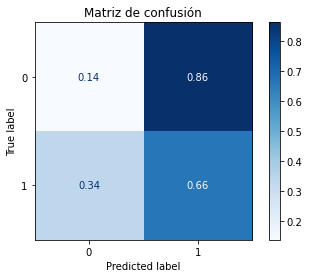

In [13]:
# Matriz de confusión.
cmp = ConfusionMatrixDisplay.from_estimator(dummy_clf, Xtest, Ytest, normalize='true', cmap='Blues')
cmp.ax_.set_title('Matriz de confusión')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy: ", accuracy_score(Ytest, Ytest_predicted))
print("F1 score: ", f1_score(Ytest, Ytest_predicted))
print("precision: ", precision_score(Ytest, Ytest_predicted))
print("recall: ", recall_score(Ytest, Ytest_predicted))

Accuracy:  0.5288461538461539
F1 score:  0.6666666666666666
precision:  0.620253164556962
recall:  0.7205882352941176


#**Ejercicio-4.**
## SVM

In [15]:
# Declaramos el clasificador SVC.
model_SVM = SVC()
model_SVM.fit(Xtrain, Ytrain)

SVC()

In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}                                # kernel = 'rbf' es el kernel por defecto, si le pones otros tarda muchisimo. 
  
grid = GridSearchCV(model_SVM, param_grid, refit = True, verbose = 3)
  
# Ajustamos el modelo a los datos de entrenamiento.
grid.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
# Mejores parámetros.
print("Mejores params: ", grid.best_params_)

# Mejor modelo.
print("Mejor estimador:" , grid.best_estimator_)



Mejores params:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mejor estimador: SVC(C=0.1, gamma=1)


In [18]:
# Predicción con el mejor modelo.
Ypred = grid.predict(Xtest)
report = classification_report(Ytest, Ypred, target_names=['False', 'True'],zero_division=0)
print(report)

print("Accuracy: ", accuracy_score(Ytest, Ypred))
print("F1 score: ", f1_score(Ytest, Ypred))
print("precision: ", precision_score(Ytest, Ypred))
print("recall: ", recall_score(Ytest, Ypred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        36
        True       0.65      1.00      0.79        68

    accuracy                           0.65       104
   macro avg       0.33      0.50      0.40       104
weighted avg       0.43      0.65      0.52       104

Accuracy:  0.6538461538461539
F1 score:  0.7906976744186047
precision:  0.6538461538461539
recall:  1.0


#**Ejercicio-5.**

In [19]:

# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y_true, y_pred):
    return (np.mean(np.square(y_true - y_pred)))**(1/2)


# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_true, y_pred):
    return (np.mean((np.abs(y_true - y_pred)/y_true)))*100



In [20]:
modelos=list([DummyClassifier(strategy = 'stratified'), SVC(kernel='rbf', C=0.1, gamma=1)])
resultados=list()
for i in range(len(modelos)):
    
    pipeline = Pipeline(steps=[('ct', columnTransformer),
                               ('m', modelos[i])])
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    
    mismetricas = {'RMSE': make_scorer(mi_RMSE),
               'MAE': make_scorer(mi_MAE),
               'MAPE': make_scorer(mi_MAPE)}
                        
    resultadosImp = cross_validate(pipeline,
                                   Xtrain, Ytrain,
                                   scoring=mismetricas,
                                   cv=kfold,
                                   return_train_score=True)

    resultados.append(resultadosImp)

    print("***** Entrenamiento *****", resultadosImp)

***** Entrenamiento ***** {'fit_time': array([0.02391958, 0.02167869, 0.01452756, 0.01440668, 0.01592994,
       0.01484466, 0.01421762, 0.02433848, 0.0140276 , 0.01461267,
       0.01388454, 0.01412272, 0.01410341, 0.01478887, 0.01438427]), 'score_time': array([0.01078057, 0.01487112, 0.01033163, 0.00962901, 0.00833559,
       0.00812864, 0.00807786, 0.00881386, 0.00941944, 0.00846577,
       0.00817823, 0.00835347, 0.01628184, 0.00843072, 0.00902057]), 'test_RMSE': array([0.6377928 , 0.63380549, 0.66666667, 0.68562779, 0.66022529,
       0.73068345, 0.67936622, 0.61324414, 0.64715023, 0.6730464 ,
       0.7535228 , 0.66666667, 0.61324414, 0.67936622, 0.65372045]), 'train_RMSE': array([0.64715023, 0.638161  , 0.64645994, 0.69263564, 0.63144333,
       0.66022529, 0.67074093, 0.64645994, 0.65790259, 0.64149346,
       0.62702663, 0.64810697, 0.65465367, 0.65628014, 0.63481105]), 'test_MAE': array([0.40677966, 0.4017094 , 0.44444444, 0.47008547, 0.43589744,
       0.53389831, 0.46153846

[array([0.64715023, 0.638161  , 0.64645994, 0.69263564, 0.63144333,
       0.66022529, 0.67074093, 0.64645994, 0.65790259, 0.64149346,
       0.62702663, 0.64810697, 0.65465367, 0.65628014, 0.63481105]), array([0.41880342, 0.40724947, 0.41791045, 0.47974414, 0.39872068,
       0.43589744, 0.44989339, 0.41791045, 0.43283582, 0.41151386,
       0.39316239, 0.42004264, 0.42857143, 0.43070362, 0.40298507]), array([0.56235159, 0.56364637, 0.56364637, 0.56364637, 0.56364637,
       0.56235159, 0.56364637, 0.56364637, 0.56364637, 0.56364637,
       0.56235159, 0.56364637, 0.56364637, 0.56364637, 0.56364637]), array([0.31623932, 0.31769723, 0.31769723, 0.31769723, 0.31769723,
       0.31623932, 0.31769723, 0.31769723, 0.31769723, 0.31769723,
       0.31623932, 0.31769723, 0.31769723, 0.31769723, 0.31769723])]


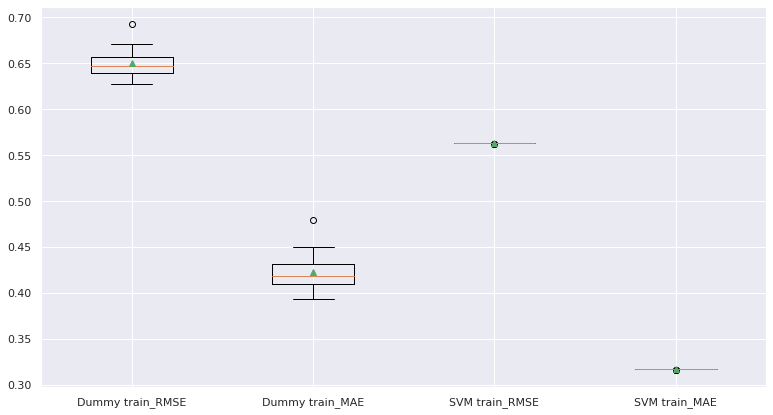

In [21]:
sns.set(rc={'figure.figsize':(13,7)})
bpRecall=list()
labels=list()

models_name = ['Dummy ','SVM ']

for i in range(len(resultados)):
  for m in ['train_RMSE', 'train_MAE']:
    bpRecall.append(resultados[i][m])
    labels.append(models_name[i] + m)

print(bpRecall)
plt.boxplot(bpRecall, labels=labels, showmeans=True)
 
# show plot
plt.show()

In [22]:
# Conclusiones

#**Ejercicio-6.**
## Verificacion:
Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento,
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno
de estos problemas

In [66]:
#Definición de función para graficar

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if(i<2):
       plt.ylabel('f1_score')
    else:
       plt.ylabel('recall') 
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [68]:
#Definición de función para encontrar las curvas de Validación

def mi_ValidationCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curva de validación acorde a max_depth')
    plt.xlabel('Max_Depth de 1 a 20')
    plt.ylabel('f1 score')  

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [63]:
#Definición para crear la curva de validación en base a los parámetros

def create_validation_curve (model, x_val, y_val,cv,param_name,scoring= 'accuracy' ):
    
    pipe = Pipeline(steps = [
      ('cT', columnTransformer ),
      ('model', model)
  ])
    
    param_range = np.linspace(1,20,20,dtype="int")

    t_scores, v_scores = validation_curve(
      estimator= pipe,
      X = x_val,
      y = y_val,
      param_name = f"model__{param_name}",
      param_range = param_range,
      cv = cv,
      scoring = scoring,
      )

    return param_range, t_scores, v_scores

In [64]:
#Función f1-score    
def mi_fscore(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
     fscore = (2 * vp) / ((2*vp) + fp + vn)
  
     return fscore   

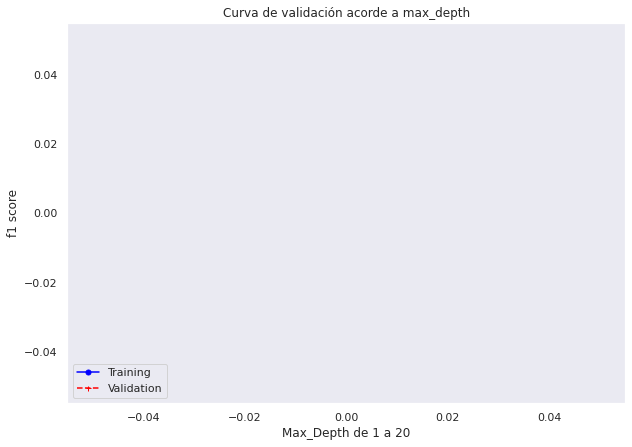

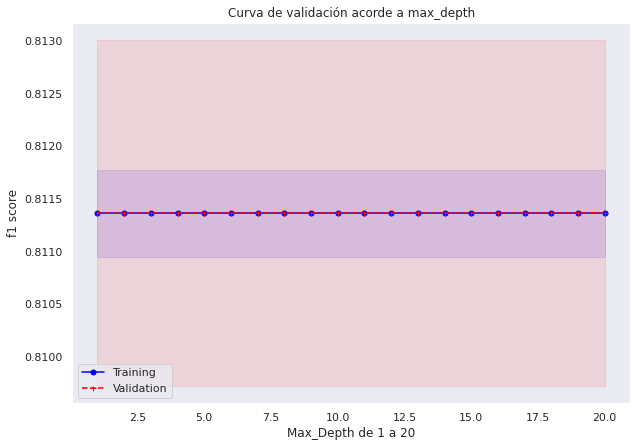

In [74]:
from sklearn import svm
modelnol = svm.SVC(kernel='rbf', C=0.1, gamma=0.03)     # intenta con kernel lineal y radial y varios casos de C y gamma
                                                     # Recuerda que gammas muy grandes pueden llevar al sobreentrenamiento.
modelnol.fit(X, Y)

#Acorde a la instrucción, se toman las 5 particiones y las 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) 

# for i in range(len(resultados)):
    # param_range, train_scores, test_scores = create_validation_curve(modelos[1], Xtrain, Ytrain, cv, 'gamma', make_scorer(mi_fscore))
    # mi_LearningCurvePlot(param_range, )
param_range, train_scores, test_scores = create_validation_curve(modelos[0], Xtrain, Ytrain, cv, 'strategy', make_scorer(mi_fscore))
mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=5)

param_range, train_scores, test_scores = create_validation_curve(modelos[1], Xtrain, Ytrain, cv, 'gamma', make_scorer(mi_fscore))
mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=5)

#**Ejercicio-7.**
## Curva ROC y su área bajo la curva.

score:  0.6538461538461539


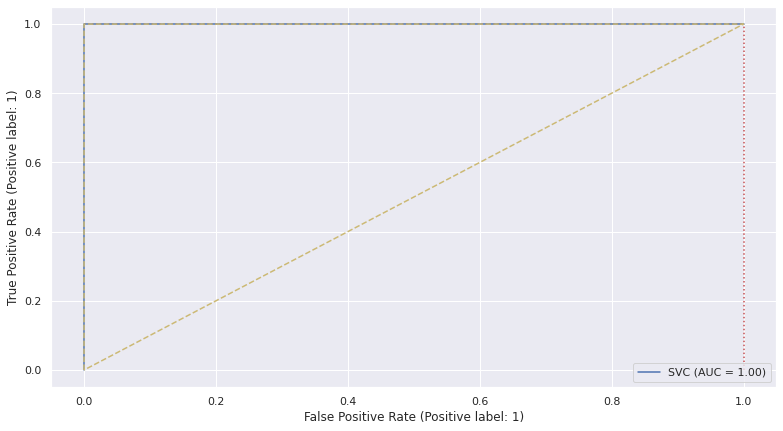

In [76]:
from sklearn import metrics
modeloSVM = SVC(kernel='rbf', C=0.1, gamma=1) # {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
modeloSVM.fit(Xtest, Ytest)
print("score: ", modeloSVM.score(Xtest, Ytest))

metrics.RocCurveDisplay.from_estimator(modeloSVM, Xtest, Ytest)

# Obtenemos las predicciones del modelo:
yhat = modeloSVM.predict(Xtest)

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, _ = metrics.roc_curve(Ytest, yhat)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

###**Fin de la Actividad de la semana 8.**